# Analysis of the world population

**Loading all libraries requied for the analysis**

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 8)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Read in the data to use**

In [2]:
def sheets_to_df_map(xls):
    '''
    Function to read all sheets within an excel file and turn them to a map
    '''
    sheet_to_df_map = {}
    for sheet_name in xls.sheet_names:
        sheet_to_df_map[sheet_name] = xls.parse(sheet_name)
    return sheet_to_df_map

In [3]:
ContXls = pd.ExcelFile('ContinentsData.xlsx')
ContXls.sheet_names

['Population Growth Rate',
 'Population by Country',
 'Africa',
 'Asia',
 'Europe',
 'North America',
 'Oceania',
 'South America',
 'Antarctica']

In [4]:
continents = sheets_to_df_map(ContXls)
#CountryPops = sheets_to_df_map(CountryPopsXls)

In [5]:
#Split the map into separate variable that contains each sheet that was in the Excel file
Africa = continents['Africa']
Asia = continents['Asia']
Europe = continents['Europe']
North = continents['North America']
Oceania = continents['Oceania']
South = continents['South America']
Antarctica = continents['Antarctica']

PopRate = continents['Population Growth Rate']
PopPerc = continents['Population by Country']

### Data Cleaning

In [6]:
#Remove some columns from the dataframes
Africa.drop(['Flag', 'Status', 'Key'], axis=1,inplace=True)
Asia.drop(['Flag', 'Status', 'Key'], axis=1,inplace=True)
Europe.drop(['Flag', 'Status', 'Key'], axis=1,inplace=True)
North.drop(['Flag', 'Status', 'Key'], axis=1,inplace=True)
Oceania.drop(['Flag', 'Status', 'Key'], axis=1,inplace=True)
South.drop(['Flag', 'Status', 'Key'], axis=1,inplace=True)
Antarctica.drop(['Flag', 'Status', 'Key'], axis=1,inplace=True)

In [7]:
#Add a column containing the column where the country belongs
Africa['Continent'] = 'Africa'
Asia['Continent'] = 'Asia'
Europe['Continent'] = 'Europe'
North['Continent'] = 'North America'
South['Continent'] = 'South America'
Oceania['Continent'] = 'Oceania'
Antarctica['Continent'] = 'Antarctica'

In [8]:
#Create a single data frame containing all the countries
World = pd.concat([Africa, Asia, Europe,North,South,Oceania, Antarctica], ignore_index=True)

In [9]:
#Remove rows without a capital
World = World[World['Capital'] != '—']
#Rename the Name column to country
World.rename({'Name': 'Country'}, axis='columns', inplace=True)
World.head()

Country                                            Capital Continent
0       Algeria                                            Algiers    Africa
1        Angola                                             Luanda    Africa
2         Benin  Porto-Novo (official) Cotonou (seat of governm...    Africa
3      Botswana                                           Gaborone    Africa
4  Burkina Faso                                        Ouagadougou    Africa

In [10]:
#Replacing the hyphen (within Population growth rate column) with a negative sign, and typecast to float
PopRate['Population growth rate (%)'] = PopRate['Population growth rate (%)'].replace('−', '-', regex=True).astype('float')
PopRate.head()

Rank         Country  Population growth rate (%)  Key
0    42     Afghanistan                        2.25   42
1   169         Albania                        0.29  169
2    61         Algeria                        1.90   61
3   221  American Samoa                       -0.40  221
4   177         Andorra                        0.22  177

In [11]:
#Remove the source column
PopPerc.drop('Source', axis=1, inplace=True)
#Remove the % character within the '% of world population' column
PopPerc['% of world population'] = PopPerc['% of world population'].replace('%', '', regex=True).astype('float')
#Convert the Date column to datetime data type
PopPerc['Date'] = pd.to_datetime(PopPerc['Date'])
#Rename Country column name
PopPerc.rename({'Country (or dependent territory)': 'Country'}, axis='columns', inplace=True)
PopPerc.head()

Rank        Country  Population       Date  % of world population  Key
0     1          China  1362190000 2014-01-14                  19.10    2
1     2          India  1238990000 2014-01-14                  17.40    3
2     3  United States   317466000 2014-01-14                   4.45    4
3     4      Indonesia   249866000 2013-07-01                   3.50    5
4     5         Brazil   201032714 2013-07-01                   2.82    6

In [12]:
#Merge Countries with population data frames into a Single clean dataframe
WorldPop = pd.merge(World, PopRate[['Country', 'Rank', 'Population growth rate (%)']], on=['Country'])
WorldPop = pd.merge(WorldPop, PopPerc[['Country', 'Population', '% of world population']], on=['Country'])
#WorldPop.rename({'Rank': 'Popn growth rate rank'}, axis='columns', inplace=True)
WorldPop.sort_values(by=['Country'], inplace=True)
WorldPop.head()

Country           Capital Continent  Rank  \
53   Afghanistan             Kabul      Asia    42   
99       Albania            Tirana    Europe   169   
0        Algeria           Algiers    Africa    61   
100      Andorra  Andorra la Vella    Europe   177   
1         Angola            Luanda    Africa    19   

     Population growth rate (%)  Population  % of world population  
53                         2.25    25500100                 0.3600  
99                         0.29     2821977                 0.0400  
0                          1.90    38700000                 0.5400  
100                        0.22       76246                 0.0011  
1                          2.78    20609294                 0.2900

### Analysis of the data

In [13]:
#Let's represent the population by continent
WorldPop2 = WorldPop[['Continent', 'Population growth rate (%)',
                      'Population', '% of world population']].groupby('Continent').sum()
WorldPop2.head()

Population growth rate (%)  Population  % of world population
Continent                                                                   
Africa                             120.36  1085203345               15.19460
Asia                                58.30  4190014242               58.75830
Europe                               3.74   737430694               10.33710
North America                       18.35   551901433                7.74056
Oceania                             14.21    37112734                0.52268

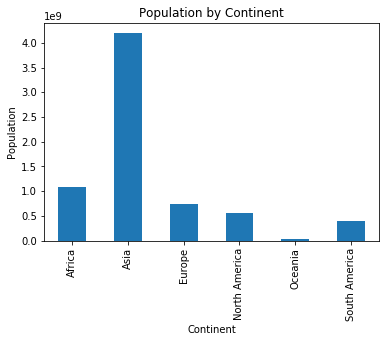

In [14]:
#Chart Visualization
WorldPop2['Population'].plot(kind='bar')
plt.title('Population by Continent')
plt.ylabel('Population')
plt.show()

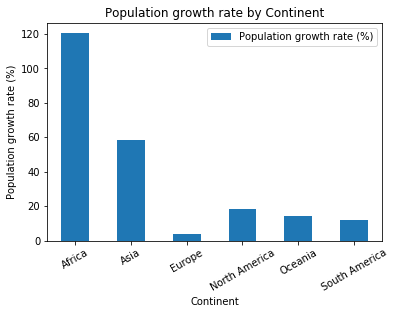

In [15]:
#Chart Visualization
WorldPop2.plot.bar(y='Population growth rate (%)', rot = 30)#(kind='bar')
plt.title('Population growth rate by Continent')
plt.ylabel('Population growth rate (%)')
plt.show()

In [16]:
import geopandas

In [17]:
import geopandas
WorldMap = geopandas.read_file("World.gpkg")
WorldMap.head()

Country continent  \
0           Afghanistan      Asia   
1                Angola    Africa   
2               Albania    Europe   
3               Andorra    Europe   
4  United Arab Emirates      Asia   

                                            geometry  
0  POLYGON ((74.89131 37.23164, 74.84023 37.22505...  
1  MULTIPOLYGON (((14.19082 -5.87598, 14.39863 -5...  
2  POLYGON ((20.06396 42.54727, 20.10352 42.52466...  
3  POLYGON ((1.70605 42.50332, 1.67852 42.49668, ...  
4  MULTIPOLYGON (((53.92783 24.17720, 53.92812 24...

In [18]:
#Rename countries
WorldMap['Country'] = WorldMap['Country'].replace({'Brunei Darussalam': 'Brunei', 
                             'Dem. Rep. Korea': 'South Korea',
                             'Lao PDR': 'Laos',
                             'Republic of Korea': 'North Korea',
                             'Russian Federation': 'Russia', 
                             'The Gambia': 'Gambia',
                             "Côte d'Ivoire": 'Ivory Coast',
                             'Republic of Congo': 'Republic of the Congo',
                             "São Tomé and Principe": 'Sao Tome and Principe', 
                            }, regex=True)

In [19]:
# Check original projection
WorldMap.crs

{'init': 'epsg:4326'}

# Spatial Data Analysis

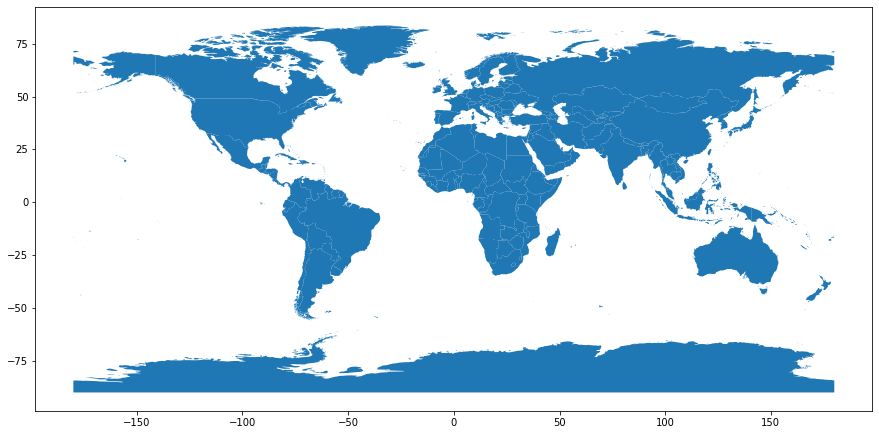

In [20]:
# Visualize
WorldMap.plot(figsize=(15, 10))
plt.show()

In [21]:
#Merge the World pops with world map data
WorldFull = pd.merge(WorldMap, WorldPop, on=['Country'])
WorldFull.tail()

Country continent  \
183         Samoa   Oceania   
184         Yemen      Asia   
185  South Africa    Africa   
186        Zambia    Africa   
187      Zimbabwe    Africa   

                                              geometry  \
183  MULTIPOLYGON (((-171.45410 -14.04648, -171.728...   
184  MULTIPOLYGON (((53.76318 12.63682, 53.82480 12...   
185  MULTIPOLYGON (((37.85693 -46.94424, 37.81396 -...   
186  POLYGON ((32.91992 -9.40742, 32.92334 -9.43398...   
187  POLYGON ((31.28789 -22.40205, 31.19727 -22.344...   

                                               Capital Continent  Rank  \
183                                               Apia   Oceania   145   
184                                             Sana'a      Asia    31   
185  Pretoria (administrative/executive) Cape Town ...    Africa   222   
186                                             Lusaka    Africa    13   
187                                             Harare    Africa     2   

     Population growth rate (%)  Population  % of world population  
183                        0.59      187820                 0.0026  
184                        2.50    25235000                 0.3500  
185                       -0.45    52981991                 0.7400  
186                        2.89    13092666                 0.1800  
187                        4.38    12973808                 0.1800

In [22]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import GeoJSONDataSource, HoverTool, LogColorMapper, LogTicker, ColorBar, TapTool
from bokeh.palettes import Viridis256 as palette
output_notebook()

Loading BokehJS ...

In [23]:
hi = WorldFull['Population'].max()
lo = WorldFull['Population'].min()
palette.reverse()

geojson = WorldFull.to_json()

geo_source = GeoJSONDataSource(geojson=geojson)

color_mapper = LogColorMapper(palette=palette, low= lo, high= hi)

TOOLS = 'pan,wheel_zoom,zoom_in,zoom_out,box_zoom,reset,save'

p = figure(tools = TOOLS, height=450, width=950,
          title="World Population map", 
           x_axis_location=None, y_axis_location=None
          )
p.grid.grid_line_color = None
p.patches(xs='xs', ys='ys', source=geo_source,
          fill_color={'field': 'Population', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

p.multi_line(xs='xs', ys='ys', line_color='black', line_width=0.5, source=geo_source)
p.add_tools(HoverTool( tooltips=[
    ("Country", "@Country"),
    ("pop_est", "@Population"),
    ("Capital", "@Capital"),
    ("(Long, Lat)", "($x, $y)"),
]))
color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                 label_standoff=12, border_line_color=None, location=(0,0))
p.add_layout(color_bar, 'left')

show(p)

In [24]:
hi = WorldFull['Rank'].max()
lo = WorldFull['Rank'].min()

geojson = WorldFull.to_json()

geo_source = GeoJSONDataSource(geojson=geojson)

color_mapper = LogColorMapper(palette=palette, low= lo, high= hi)

TOOLS = 'pan,wheel_zoom,zoom_in,zoom_out,box_zoom,reset,save'

p = figure(tools = TOOLS, height=450, width=950,
          title="World Population Growth Rate Rank Map", 
           x_axis_location=None, y_axis_location=None
          )
p.grid.grid_line_color = None
p.patches(xs='xs', ys='ys', source=geo_source,
          fill_color={'field': 'Rank', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

p.multi_line(xs='xs', ys='ys', line_color='black', line_width=0.5, source=geo_source)
p.add_tools(HoverTool( tooltips=[
    ("Country", "@Country"),
    ("pop_est", "@Population"),
    ("Capital", "@Capital"),
    ("Growth Rate Rank", "@Rank"),
    ("(Long, Lat)", "($x, $y)"),
]))
color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                 label_standoff=12, border_line_color=None, location=(0,0))
p.add_layout(color_bar, 'left')

show(p)